<span style="font-size:10pt">AI-DL @ ENSPIMA / v1.5 september 2025 / Jean-Luc CHARLES (Jean-Luc.charles@mailo.com) / CC BY-SA 4.0 /</span>

<div class="alert alert-block alert-info"> 
<span style="color: #0000BB;font-weight: bold; font-size:large;">
    Copy this notebook in the <i>Notebooks</i> directory if you want to use it...
</span></div>

<div style="color:brown;font-family:arial;font-size:26pt;font-weight:bold;text-align:center"> 
Deep learning with Python tensorflow2/keras modules</div><br>
<hr>
<div style="color:blue;font-family:arial;font-size:22pt;font-weight:bold;text-align:center"> 
Training a Dense Neural Network to classify handwritten digits<br><br>
Load the MNIST database</div>
<hr>

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:12pt">  

It is important to use a <span style="font-weight:bold;">Python Virtual Environment</span> (PVE) to ensure versions of the Python interpreter and Python modules (like tensorflow, numpy...).

To do so, notebooks from this GitHub repository must be loaded with the command `uv run jupyter lab` or `uv run jupyter notebook`.
</span></div>

Load the notebooks in this order:
- `DL1_MNIST.ipynb`: check that the PVE is fully operationnal, load and use the data from the MNIST database (images and labels).
- `DL2_DNN_part1.ipynb`: build a Dense Neural Network (DNN), train it with data from the MNIST and evaluate its performance.
- `DL2_DNN_part2.ipynb`: reload a previously trained DNN and evaluate its performance with the MNIST test data.

## Targeted learning objectives
Know how to:
- launch a notebook in a dedicated Python Virtual Environment
- load data from the MNIST bank (images and labels)
- view MNIST images and check the associated label.

Expected duration : 20 minutes

## 1 - Verify importing Python modules
The **keras** module which allows high-level manipulation of **tensorflow** objects is integrated in the **tensorflow** (tf) module since version 2. <br>
The **tf.keras** module documentation to consult is here: https://www.tensorflow.org/api_docs/python/tf/keras.

Importing the `tensorflow` module in the cell below may generate some warning messages...<br>
if errors appear they must be corrected, possibly by recreating your <b><span style="color: rgb(200, 51, 102);">pyml</span> PVE</b>:

In [1]:
import os, sys

# Delete the (numerous) warning messages from the **tensorflow** module:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")

Python    : 3.12.3
tensorflow: 2.16.2 incluant keras 3.9.2
numpy     : 1.26.4


Embedding matplotlib plots in the notebook:

In [2]:
%matplotlib inline

## 2 - Load the MNIST data (images and labels)

### ▸ The MNIST images bank

In this practical work we use labeled images from the MNIST bank available on the Internet (https://github.com/cvdfoundation/mnist).

The MNIST database contains 70,000 grayscale images of 28 $\times$ 28 pixels, representing handwritten digits: each image is a 28$\times$28 matrix of 784 `uint8` numbers (positive integers on 8 bits, coding a value in the interval [0, 255]).<br>
The 70,000 MNIST images are grouped in a set of **60,000 training images** and a set of **10,000 test images**.

<div class="alert alert-block alert-danger">
The evaluation of the performance of a trained network must always be done with a data set different from the training set: this is why the MNIST bank offers 10,000 test images <b>different</b> from the 60,000 workout pictures.
</div>
<br>Example of MNIST images:
<p style="text-align:center; font-style:italic; font-size:12px;">
<img src="img/MNIST_digits_sample.png" width="500"><br>
[image: JLC]
</p>

Consult the documentation of the `load_data` function (see the example on the page 
[tf.keras.datasets.mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) then complete the cell below to load the data from the MNIST by naming the returned data:<br>
- `im_train`, `lab_train`: the training images and labels,
- `im_test`, `lab_test`: the test images and labels.

(In case of _"SSL error...."_ type error message to download MNIST data, see [Python SSL Certification Problems in Tensorflow](https://stackoverflow.com/questions/46858630/python -ssl-certification-problems-in-tensorflow))

In [3]:
(im_train, lab_train), (im_test, lab_test) = keras.datasets.mnist.load_data()

The cell below displays the `shape` and `dtype` attributes of the resulting numpy arrays: are the values consistent? 

In [4]:
print("im_train.shape :", im_train.shape, ", dtype:", im_train.dtype,)
print("lab_train.shape:", lab_train.shape,  ", dtype:", lab_train.dtype)
print("im_test.shape  :", im_test.shape,  ", dtype:", im_test.dtype,)
print("lab_test.shape :", lab_test.shape,  ", dtype:", lab_test.dtype)

im_train.shape : (60000, 28, 28) , dtype: uint8
lab_train.shape: (60000,) , dtype: uint8
im_test.shape  : (10000, 28, 28) , dtype: uint8
lab_test.shape : (10000,) , dtype: uint8


### ▸ Images and labels visualisation:

With the `imshow` function of the `matplotlib.pyplot` module, display in gray tone the 600th image of the `im_train` array.<br>
Tips:
- use `plt.figure(figsize=(2,2))` to set the size of the image,
- use the `cmap='gray'` option of the `imshow` function to display the image in gray tone,
- remove the ticks in X and Y with `plt.axis('off');`).

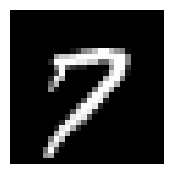

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(im_train[599], cmap='gray')
plt.axis('off');

Check that the associated label in the `im_train` table corresponds to what we see on the image....

In [6]:
lab_train[599]

7

Import the `plot_images` function from the module `utils.tools` and display the help on this function:

In [7]:
from utils.tools import plot_images
help(plot_images)

Help on function plot_images in module utils.tools:

plot_images(image_array: numpy.ndarray, R: int, C: int, r: int = 0, figsize: tuple = None, reverse: bool = False)
    Plot the images from image_array on a R x C grid, starting at image rank r.
    Arguments:
       image_array: an array of images
       R:int: the number of rows
       C:int: the number of columns
       r:int: the starting rank in the array image_array (default: 0)
       figsize:tuple: the sise of the display (default: (C//2+1, R//2+1))
       reverse:bool: wether to reverse video the image or not (default: False)



Using the `plot_images` function, display the training images in a 4 x 6 grid beginning with the 600th image:

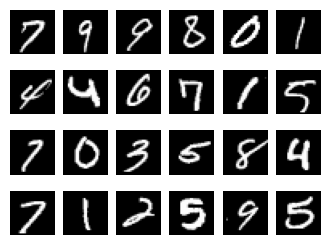

In [8]:
plot_images(im_train, 4, 6, 599)

In the cell below, we sort the images and we display rows of 16 $\times$ '0', 16 $\times$ '1'... in black over a white background:

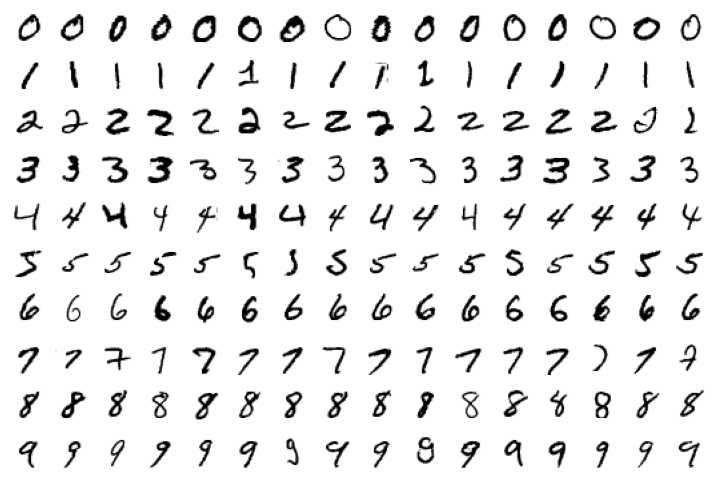

In [9]:
data = np.ndarray((10*16, 28, 28))
for i in range(10):
    indexes = np.where(lab_train == i) # array of the ranks of the labels equal to i
    i_data = im_train[indexes][:16].tolist()    # array of the 16 associated images
    data[i*16:(i+1)*16] = i_data
    
R, C = 10, 16
plot_images(data, R, C, reverse=True)

### Further work:
You can now load the `DL2_DNN_part1_en.ipynb` *notebook* to learn how to build a Dense Neural Network and train it to classify MNIST images.